In [1]:
# Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from model_helpers import eval_perform_multi_class
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = "../CHESS/data/df_3_cod.csv"
df_3 = pd.read_csv(data_path)
df_3.columns

Index(['game_id', 'rated', 'turns', 'winner', 'time_increment', 'white_rating',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_variation',
       'moves_fen', 'current_turn', 'w_ctrld_pawn', 'w_ctrld_knight',
       'w_ctrld_bishop', 'w_ctrld_rook', 'w_ctrld_queen', 'w_ctrld_king',
       'w_preassure_points', 'w_ctrld_diagonals', 'w_ctrld_lines',
       'b_ctrld_pawn', 'b_ctrld_knight', 'b_ctrld_bishop', 'b_ctrld_rook',
       'b_ctrld_queen', 'b_ctrld_king', 'b_preassure_points',
       'b_ctrld_diagonals', 'b_ctrld_lines', 'rated_cod', 'winner_cod',
       'current_turn_cod', 'time_increment_cod', 'opening_code_cod',
       'opening_fullname_cod', 'opening_shortname_cod',
       'opening_variation_cod', 'moves_fen_cod'],
      dtype='object')

# Df original codificado y sin user_id White_id, Black_id y Opening_response (Variables no relevantes o con muchos valores nulos). 

In [3]:
X = df_3.copy()
y_name = "winner_cod"
# X es el dataframe eliminando la variable de salida
X = X.drop(columns=['rated','winner',y_name, 'current_turn','time_increment','opening_code','opening_fullname','opening_shortname','opening_variation','moves_fen'])
X = X.drop(columns=['game_id', 'white_rating', 'black_rating', 'moves', 'current_turn_cod', 'opening_moves', 'rated_cod', 'current_turn_cod', 'time_increment_cod', 'opening_code_cod', 'opening_fullname_cod', 'opening_shortname_cod', 'opening_variation_cod', 'moves_fen_cod'])
# Y es un array unidimensional (ravel) de la variable de salida
Y = df_3[y_name].ravel()
X.columns

Index(['turns', 'w_ctrld_pawn', 'w_ctrld_knight', 'w_ctrld_bishop',
       'w_ctrld_rook', 'w_ctrld_queen', 'w_ctrld_king', 'w_preassure_points',
       'w_ctrld_diagonals', 'w_ctrld_lines', 'b_ctrld_pawn', 'b_ctrld_knight',
       'b_ctrld_bishop', 'b_ctrld_rook', 'b_ctrld_queen', 'b_ctrld_king',
       'b_preassure_points', 'b_ctrld_diagonals', 'b_ctrld_lines'],
      dtype='object')

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)
X_train.columns

Index(['turns', 'w_ctrld_pawn', 'w_ctrld_knight', 'w_ctrld_bishop',
       'w_ctrld_rook', 'w_ctrld_queen', 'w_ctrld_king', 'w_preassure_points',
       'w_ctrld_diagonals', 'w_ctrld_lines', 'b_ctrld_pawn', 'b_ctrld_knight',
       'b_ctrld_bishop', 'b_ctrld_rook', 'b_ctrld_queen', 'b_ctrld_king',
       'b_preassure_points', 'b_ctrld_diagonals', 'b_ctrld_lines'],
      dtype='object')

# Maquina de soporte vectorial

In [5]:
# Crear un clasificador SVM para clasificación con kernel lineal, polinomial y de funcion de base radial
mod_linear = svm.SVC(kernel='linear',C=1, probability=True)
mod_poly = svm.SVC(kernel='poly',degree=2,C=1, probability=True)
mod_rbf = svm.SVC(kernel='rbf',C=1,gamma='auto', probability=True)

In [6]:
# Entrenar el clasificador con los datos de entrenamiento
mod_linear.fit(X_train, Y_train)

SVC(C=1, kernel='linear', probability=True)


Performance del modelo de Prueba SVM kernel lineal características blancas y negras
 Accu 0.9065061922204779 
 Prec 0.9065677136353623 
 Reca 0.9065061922204779 
 Matriz de confusión:
 [[2450  294]
 [ 242 2747]]

Métricas de Probabilidad:
 Brier Score: 0.07009461997374805


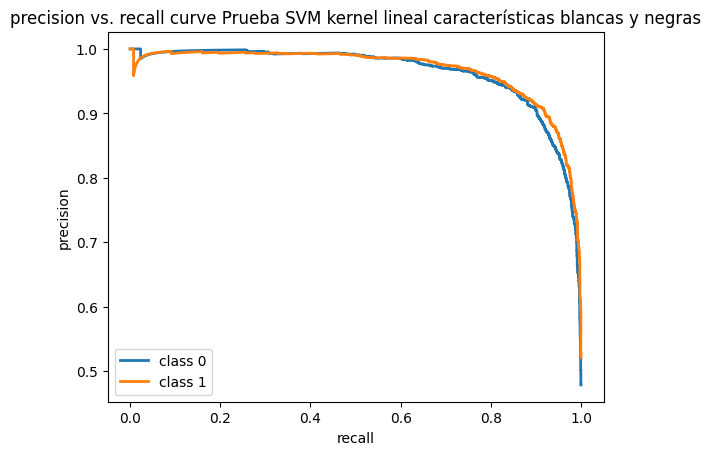

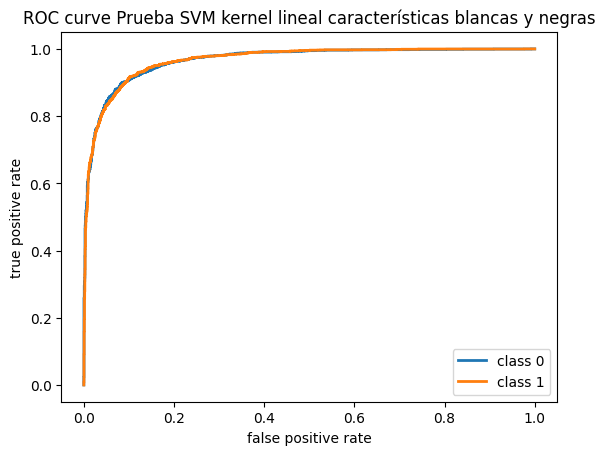


Performance del modelo de Entrenamiento SVM kernel lineal características blancas y negras
 Accu 0.907588785046729 
 Prec 0.9075764291588365 
 Reca 0.907588785046729 
 Matriz de confusión:
 [[5726  637]
 [ 599 6413]]

Métricas de Probabilidad:
 Brier Score: 0.07073546774855395


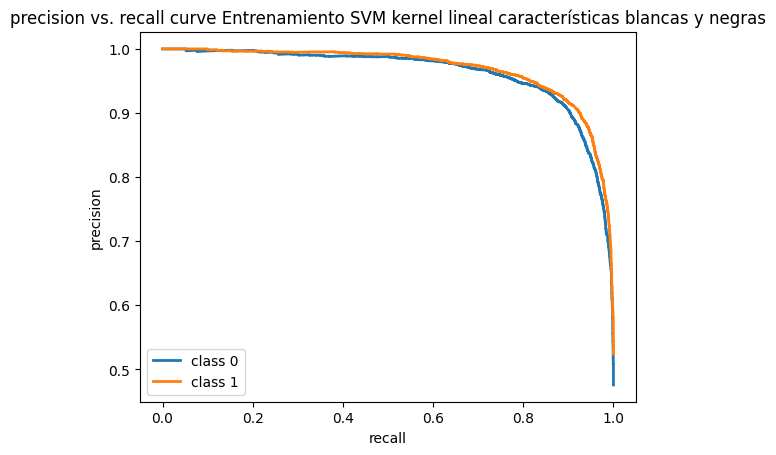

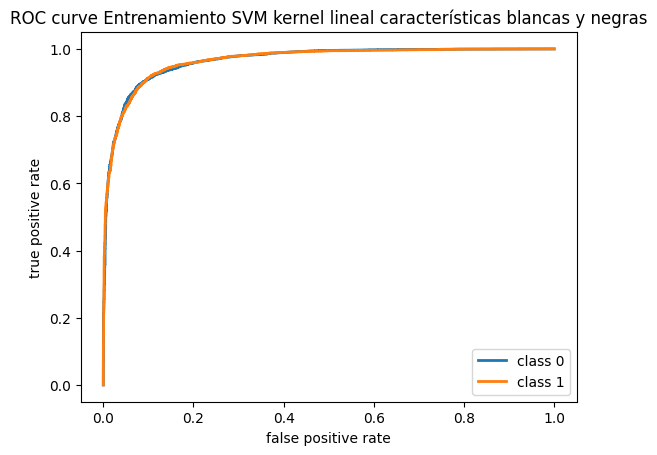

(0.907588785046729,
 0.9075764291588365,
 0.907588785046729,
 0.07073546774855395,
 array([[5726,  637],
        [ 599, 6413]], dtype=int64))

In [7]:
# Salida Y & "hat" (ŷ) que denota predicciones estimadas.
Yhat_linear_test = mod_linear.predict(X_test)
Yhat_linear_train = mod_linear.predict(X_train)
Yhat_linear_test_prob = mod_linear.predict_proba(X_test)
Yhat_linear_train_prob = mod_linear.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_linear_test,Yhat_linear_test_prob,2,"Prueba SVM kernel lineal características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_linear_train,Yhat_linear_train_prob,2, "Entrenamiento SVM kernel lineal características blancas y negras")

In [8]:
mod_poly.fit(X_train, Y_train)

SVC(C=1, degree=2, kernel='poly', probability=True)

In [9]:
mod_rbf.fit(X_train, Y_train)

SVC(C=1, gamma='auto', probability=True)


Performance del modelo de Prueba SVM kernel polinomial características blancas y negras
 Accu 0.9028431885574743 
 Prec 0.9030485624406908 
 Reca 0.9028431885574743 
 Matriz de confusión:
 [[2425  319]
 [ 238 2751]]

Métricas de Probabilidad:
 Brier Score: 0.07001563423305658


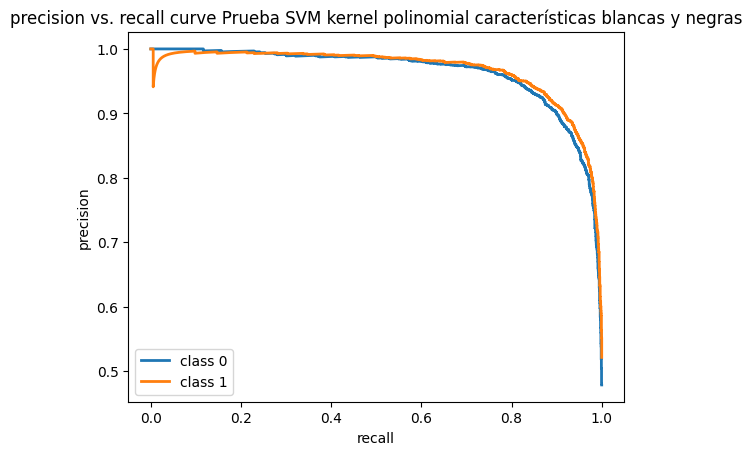

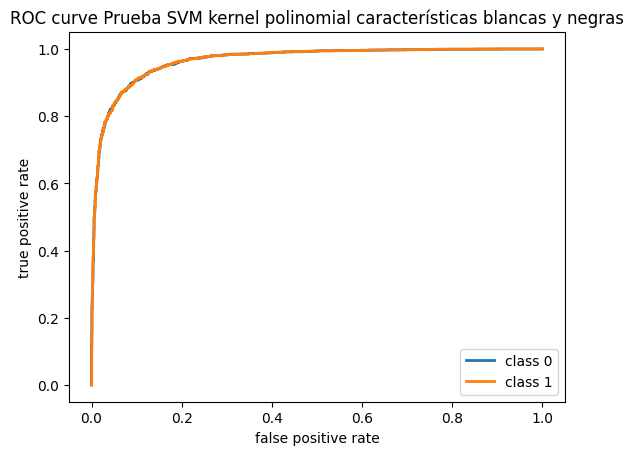


Performance del modelo de Entrenamiento SVM kernel polinomial características blancas y negras
 Accu 0.9053457943925234 
 Prec 0.9054472155129765 
 Reca 0.9053457943925234 
 Matriz de confusión:
 [[5655  708]
 [ 558 6454]]

Métricas de Probabilidad:
 Brier Score: 0.06977776341376543


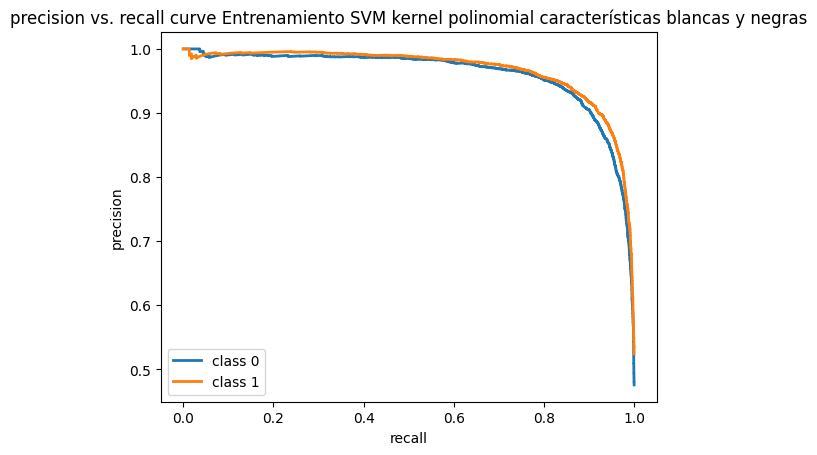

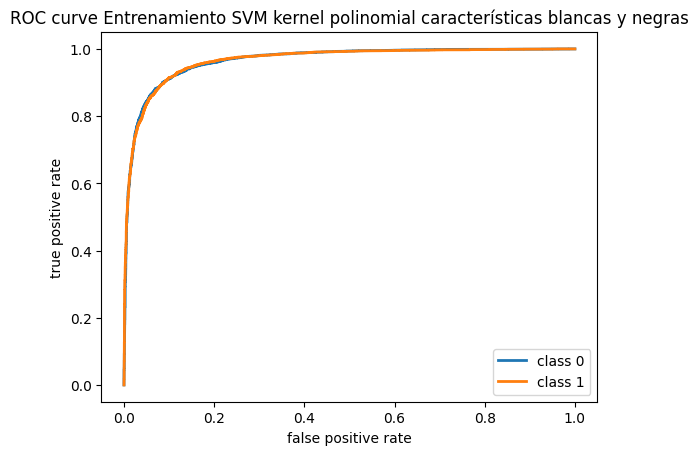

(0.9053457943925234,
 0.9054472155129765,
 0.9053457943925234,
 0.06977776341376543,
 array([[5655,  708],
        [ 558, 6454]], dtype=int64))

In [10]:
Yhat_poly_test = mod_poly.predict(X_test)
Yhat_poly_train = mod_poly.predict(X_train)
Yhat_poly_test_prob = mod_poly.predict_proba(X_test)
Yhat_poly_train_prob = mod_poly.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_poly_test, Yhat_poly_test_prob,2, "Prueba SVM kernel polinomial características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_poly_train, Yhat_poly_train_prob,2, "Entrenamiento SVM kernel polinomial características blancas y negras")


Performance del modelo de Prueba SVM kernel rbf características blancas y negras
 Accu 0.8231292517006803 
 Prec 0.8432379782191284 
 Reca 0.8231292517006803 
 Matriz de confusión:
 [[1878  866]
 [ 148 2841]]

Métricas de Probabilidad:
 Brier Score: 0.10718534192628766


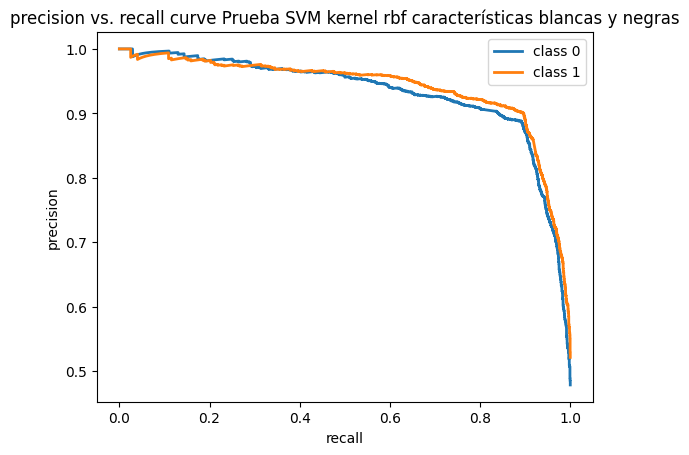

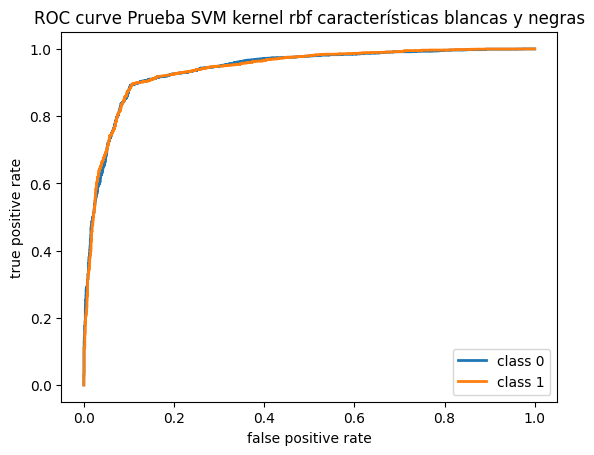


Performance del modelo de Entrenamiento SVM kernel rbf características blancas y negras
 Accu 0.9957383177570094 
 Prec 0.9957385107316566 
 Reca 0.9957383177570094 
 Matriz de confusión:
 [[6336   27]
 [  30 6982]]

Métricas de Probabilidad:
 Brier Score: 0.0036662226074406262


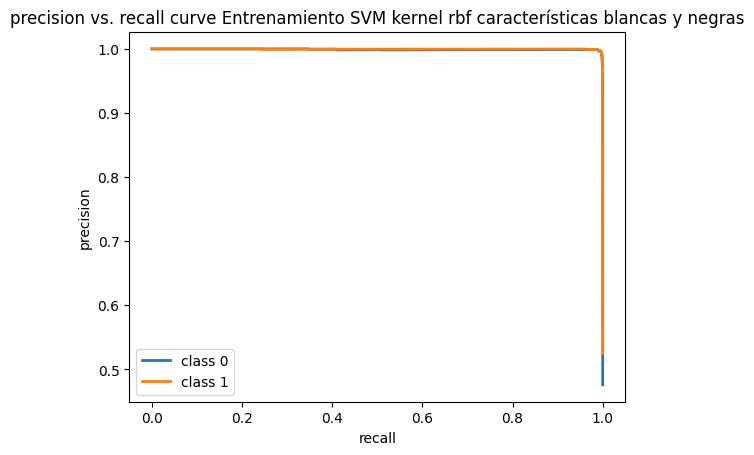

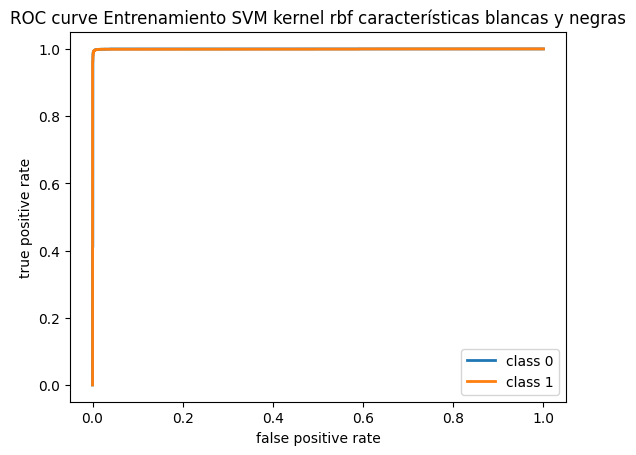

(0.9957383177570094,
 0.9957385107316566,
 0.9957383177570094,
 0.0036662226074406262,
 array([[6336,   27],
        [  30, 6982]], dtype=int64))

In [11]:
Yhat_rbf_test = mod_rbf.predict(X_test)
Yhat_rbf_train = mod_rbf.predict(X_train)
Yhat_rbf_test_prob = mod_rbf.predict_proba(X_test)
Yhat_rbf_train_prob = mod_rbf.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_rbf_test, Yhat_rbf_test_prob,2,"Prueba SVM kernel rbf características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_rbf_train, Yhat_rbf_train_prob,2,"Entrenamiento SVM kernel rbf características blancas y negras")

# Regresión logística

In [12]:
from sklearn.linear_model import LogisticRegression
# Comparacion con regresion logistica
# Usar regularización L1 (Lasso)
reg_log = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)

In [13]:
reg_log.fit(X_train,Y_train)

LogisticRegression(max_iter=2000, penalty='l1', solver='liblinear')


Performance del modelo de Prueba regresión logística reg lasso características blancas y negras
 Accu 0.9054596197453341 
 Prec 0.9054993364569194 
 Reca 0.9054596197453341 
 Matriz de confusión:
 [[2450  294]
 [ 248 2741]]

Métricas de Probabilidad:
 Brier Score: 0.06987588004502807


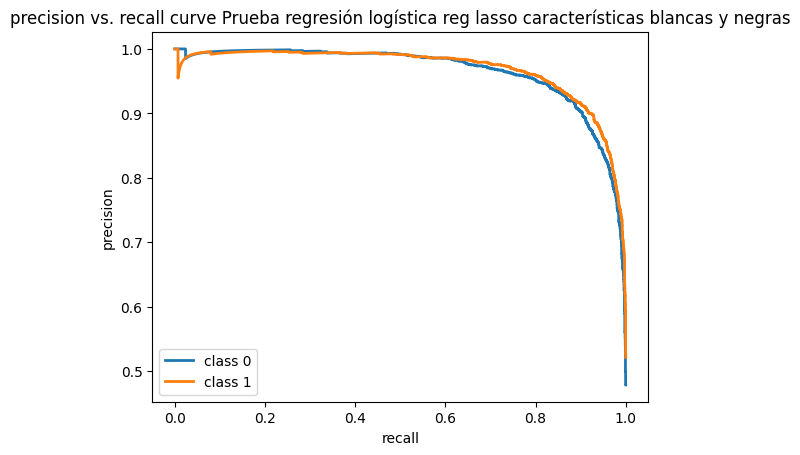

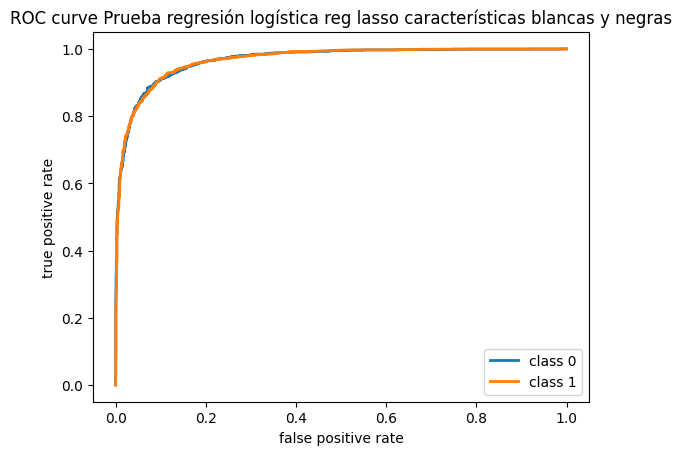


Performance del modelo de Entrenamiento regresión logística reg lasso características blancas y negras
 Accu 0.9063177570093458 
 Prec 0.9063050281542699 
 Reca 0.9063177570093458 
 Matriz de confusión:
 [[5717  646]
 [ 607 6405]]

Métricas de Probabilidad:
 Brier Score: 0.07077876212107646


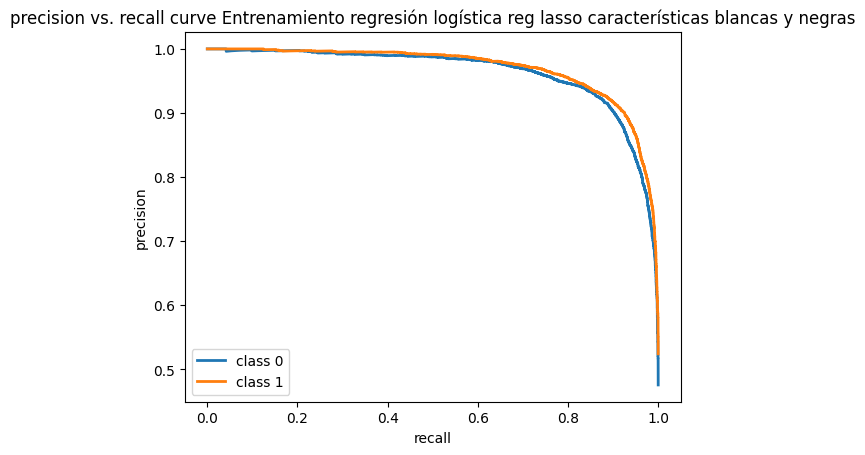

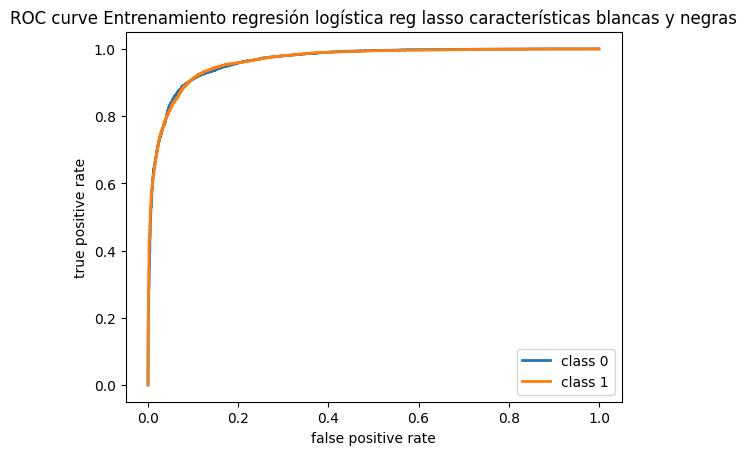

(0.9063177570093458,
 0.9063050281542699,
 0.9063177570093458,
 0.07077876212107646,
 array([[5717,  646],
        [ 607, 6405]], dtype=int64))

In [14]:
# Salida Y & "hat" (ŷ) que denota predicciones estimadas.
Yhat_log_test = reg_log.predict(X_test)
Yhat_log_train = reg_log.predict(X_train)
Yhat_log_test_proba = reg_log.predict_proba(X_test)
Yhat_log_train_proba = reg_log.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_log_test, Yhat_log_test_proba,2,"Prueba regresión logística reg lasso características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_log_train, Yhat_log_train_proba,2,"Entrenamiento regresión logística reg lasso características blancas y negras")

# XGboost de ejemplo para comparar el performance (características blancas y negras)

A pesar de no haber sido visto en clase, se utiliza para comparar este poderoso modelo con los ya presentados con la hipotesis de que se obtendrán mejores resultados.

In [15]:
import xgboost as xgb
# Crear un clasificador XGBoost
xgboost = xgb.XGBClassifier()

In [16]:
# Entrenar el modelo en los datos de entrenamiento
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Performance del modelo de Prueba Xgboost características blancas y negras
 Accu 0.9136577708006279 
 Prec 0.9136627935085807 
 Reca 0.9136577708006279 
 Matriz de confusión:
 [[2482  262]
 [ 233 2756]]

Métricas de Probabilidad:
 Brier Score: 0.06215684962074576


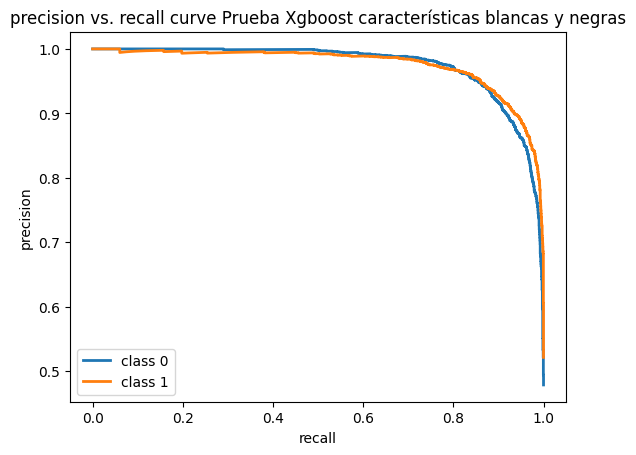

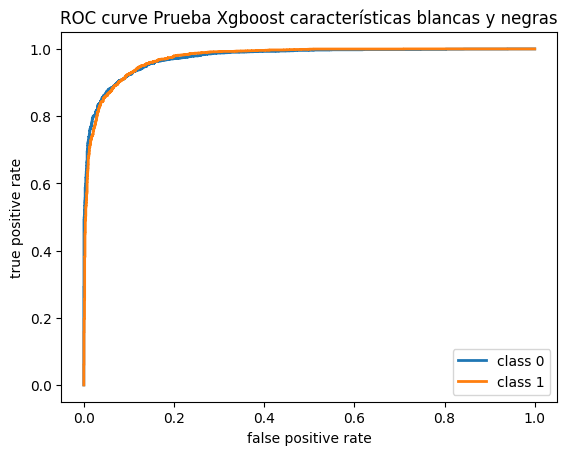


Performance del modelo de Entrenamiento Xgboost características blancas y negras
 Accu 0.988411214953271 
 Prec 0.9884110671855152 
 Reca 0.988411214953271 
 Matriz de confusión:
 [[6283   80]
 [  75 6937]]

Métricas de Probabilidad:
 Brier Score: 0.01400474431894197


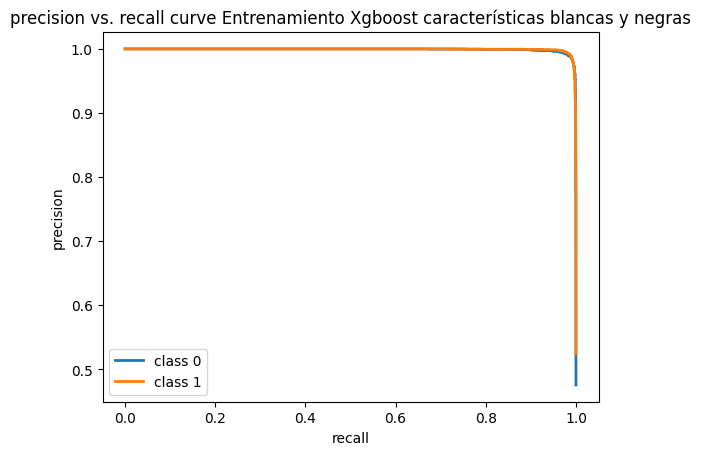

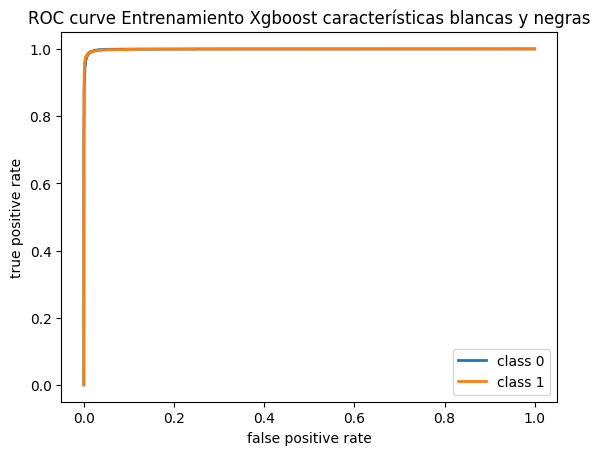

(0.988411214953271,
 0.9884110671855152,
 0.988411214953271,
 0.01400474431894197,
 array([[6283,   80],
        [  75, 6937]], dtype=int64))

In [17]:
Yhat_xgboost_test = xgboost.predict(X_test)
Yhat_xgboost_train = xgboost.predict(X_train)
Yhat_xgboost_test_prob = xgboost.predict_proba(X_test)
Yhat_xgboost_train_prob = xgboost.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_xgboost_test, Yhat_xgboost_test_prob,2,"Prueba Xgboost características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_xgboost_train, Yhat_xgboost_train_prob,2,"Entrenamiento Xgboost características blancas y negras")

In [18]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 7012, number of negative: 6363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 13375, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524262 -> initscore=0.097123
[LightGBM] [Info] Start training from score 0.097123


LGBMClassifier()


Performance del modelo de Prueba LightGBM características blancas y negras
 Accu 0.909820338391767 
 Prec 0.9098303160114966 
 Reca 0.909820338391767 
 Matriz de confusión:
 [[2469  275]
 [ 242 2747]]

Métricas de Probabilidad:
 Brier Score: 0.06301553386032062


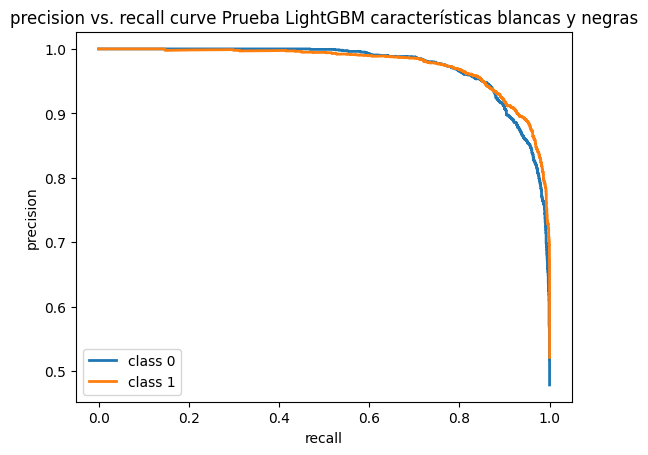

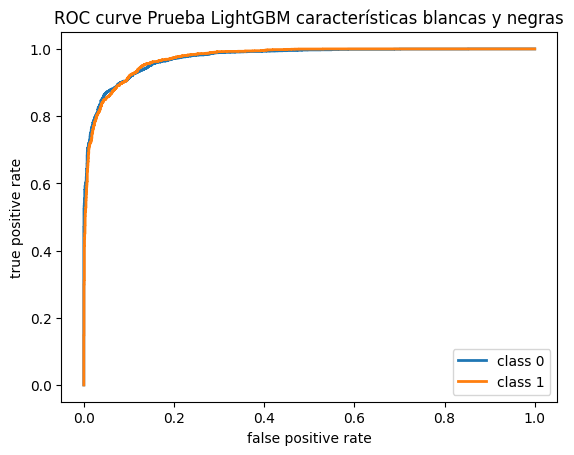


Performance del modelo de Entrenamiento LightGBM características blancas y negras
 Accu 0.9563364485981308 
 Prec 0.9563355750409553 
 Reca 0.9563364485981308 
 Matriz de confusión:
 [[6057  306]
 [ 278 6734]]

Métricas de Probabilidad:
 Brier Score: 0.03494358524949547


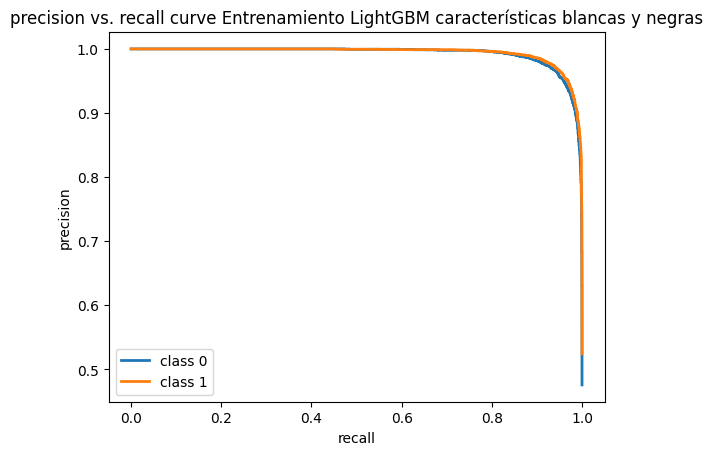

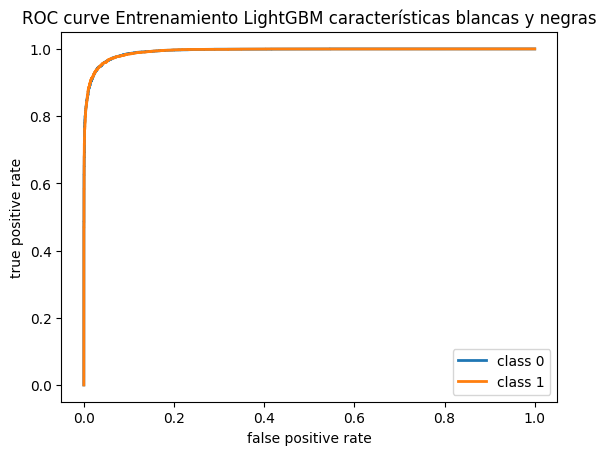

(0.9563364485981308,
 0.9563355750409553,
 0.9563364485981308,
 0.03494358524949547,
 array([[6057,  306],
        [ 278, 6734]], dtype=int64))

In [19]:
Yhat_lgbm_test = lgbm.predict(X_test)
Yhat_lgbm_train = lgbm.predict(X_train)
Yhat_lgbm_test_prob = lgbm.predict_proba(X_test)
Yhat_lgbm_train_prob = lgbm.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_lgbm_test,Yhat_lgbm_test_prob, 2, "Prueba LightGBM características blancas y negras")
eval_perform_multi_class(Y_train,Yhat_lgbm_train,Yhat_lgbm_train_prob, 2 ,"Entrenamiento LightGBM características blancas y negras")